### 4. 로지스틱 회귀(Logistic Regression)
- 시그모이드 함수를 이용하여, 회귀를 분류로 바꾼 것. X(피처)->y_hat(예측값): 0 or 1
- BUT, 로지스틱 회귀 또한 선형 회귀의 일종!(함수 모양이 비선형이나, 회귀계수는 여전히 선형이므로.)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression #linear_model 클래스의 일종임

In [7]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [11]:
#피처에 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=.3, random_state=0)

- 로지스틱 회귀 수행!

In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score

#객체
lr_clf = LogisticRegression()
#학습
lr_clf.fit(X_train, y_train)
#예측
lr_pred = lr_clf.predict(X_test)

#평가(정확도, auc값)
print('정확도 값: {0:.3f}'.format(accuracy_score(y_test, lr_pred)))
print('AUC 값: {0:.3f}'.format(roc_auc_score(y_test, lr_pred)))

정확도 값: 0.982
AUC 값: 0.979


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- 로지스틱 회귀도 과적합 방지할 수 있는 하이퍼 파라미터를 바꿀 수 있음! (하이퍼파라미터: 'penalty'(l1,l2), 'C'(1/alpha)) (여기서 penalty의 디폴트는 l2)
- 그리드서치 시행하여 하이퍼 파라미터 튜닝

In [17]:
from sklearn.model_selection import GridSearchCV

#객체
lr_clf = LogisticRegression()
#파라미터(딕셔너리 형태)
params = {'penalty':['l2','l1'], 'C':[0.01, 0.1, 1, 3, 5, 10]}
#그리드서치
grid_clf = GridSearchCV(lr_clf, params, scoring='accuracy', cv=3, refit=True)

In [18]:
#학습
grid_clf.fit(X_train, y_train) ##책에서는 X,y 전체데이터를 사용했는데 사실 트레인셋으로만 학습을 진행하는 것이 맞다!
#cv 결과
print('최적의 파라미터는: ', grid_clf.best_params_)
print('최적의 파라미터일 때의 정확도는: {0:.3f}'.format(grid_clf.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

최적의 파라미터는:  {'C': 1, 'penalty': 'l2'}
최적의 파라미터일 때의 정확도는: 0.985


In [20]:
#예측
est_clf = grid_clf.best_estimator_
pred = est_clf.predict(X_test)
#평가
print('정확도 값: {0:.3f}'.format(accuracy_score(y_test, pred)))
print('AUC 값: {0:.3f}'.format(roc_auc_score(y_test, pred)))

정확도 값: 0.982
AUC 값: 0.979


### 5. 회귀 트리(DecisionTreeRegressor)
- 앞의 4장에서 했던 의사결정나무(분류) 버전을 회귀 버전으로 한 것.
- 배깅과 부스팅도 전부 의사결정나무를 기반으로 하고 있기 때문에 모두(DT, rf, GBM, XGBoost, LightGBM) 회귀 버전도 제공하고 있다.
- 분류트리랑 다른 것은 분류트리의 경우 리프노드에 클래스 값이 출력되는데, 회귀트리의 경우는 리프노드에 거기 속하는 데이터의 "평균값"을 제공한다는 것.

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 회귀버전!
import pandas as pd
import numpy as np

In [2]:
#보스턴 주택가격 예측 데이터를 활용해 회귀 수행!(앞에서는 선형회귀, 이번엔 회귀 트리-랜덤 포레스트 이용)
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
X_df = boston_df.drop('PRICE',axis=1)
y_df = boston_df['PRICE']

In [4]:
##랜덤 포레스트
#객체
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
#cv, 평가
neg_mse_score = cross_val_score(rf, X_df, y_df, scoring="neg_mean_squared_error", cv=5)
rmse_score = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmse_score)

print('평균 RMSE: {0:.3f}'.format(avg_rmse))

평균 RMSE: 4.420


- 다양한 유형의 회귀 트리 만들기

In [5]:
#avg_RMSE 출력
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_score = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_score = np.sqrt(-1*neg_mse_score)
    avg_rmse = np.mean(rmse_score)
    print('####', model.__class__.__name__, '####')
    print('평균 RMSE: {0:.3f}'.format(avg_rmse))

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [7]:
#객체
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

In [8]:
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for i in models:
    get_model_cv_prediction(i, X_df, y_df)

#### DecisionTreeRegressor ####
평균 RMSE: 5.978
#### RandomForestRegressor ####
평균 RMSE: 4.420
#### GradientBoostingRegressor ####
평균 RMSE: 4.272
[16:13:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:13:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:13:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:13:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:13:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#### XGBRegressor ####
평균 RMSE: 4.089
#### LGBMRegressor ####
평균 RMSE: 4.646


##### 피처 중요도 값 시각화
- 결정트리, rf: feature_importances_

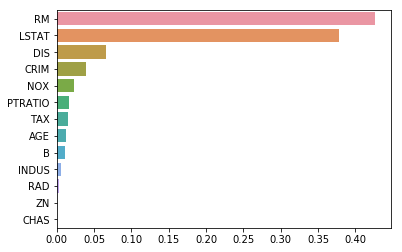

In [9]:
import seaborn as sns
%matplotlib inline

#rf로 만든 모델에 대해서만 시각화
#객체
#학습
rf_reg.fit(X_df, y_df)
#시각화
ftr = pd.Series(data=rf_reg.feature_importances_, index=X_df.columns) #시리즈
ftr_top = ftr.sort_values(ascending=False) #내림차순
sns.barplot(ftr_top.values, ftr_top.index)

### 회귀 트리 하이퍼 파라미터 튜닝 + 선형 회귀와 그래프 비교

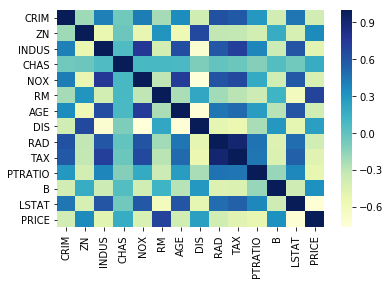

In [10]:
corr = boston_df.corr()
sns.heatmap(corr, cmap='YlGnBu') #target인 price 컬럼과 가장 상관성이 높은 것은 (양) RM / (음) LSTAT

(100, 2)


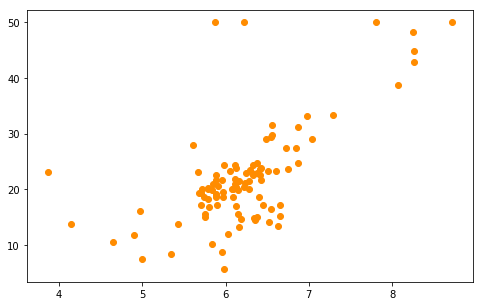

In [13]:
#X 중 'RM'만 뽑고, X,y 데이터 100개만 가지고 하이퍼 파라미터 튜닝을 할 것임
sample_df = boston_df[['RM','PRICE']]
sample_df = sample_df.sample(n=100, random_state=0) #랜덤하게 100개만 추출

print(sample_df.shape)
plt.figure(figsize=(8,5))
plt.scatter(sample_df['RM'], sample_df['PRICE'], c= 'darkorange')

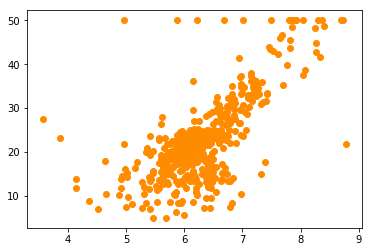

In [14]:
#참고:원본
plt.scatter(boston_df['RM'], boston_df['PRICE'], c= 'darkorange')

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#선형회귀 vs dt(max_depth=2, 7) 얘들이 예측한 회귀를 그래프로 나타내면 어떤 모양이 될까?

#객체
lr_reg=LinearRegression()
rf_reg2= DecisionTreeRegressor(max_depth=2)
rf_reg7= DecisionTreeRegressor(max_depth=7)

#X_test 만듦(100개만)->예측 얘로 진행 //평가는 불가(정답 데이터가 없으니까)
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1) #2차원
#학습 데이터 만듦(100개만)
X_feature = sample_df[['RM']]
y_target = sample_df[['PRICE']]

#학습
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)
#예측
pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

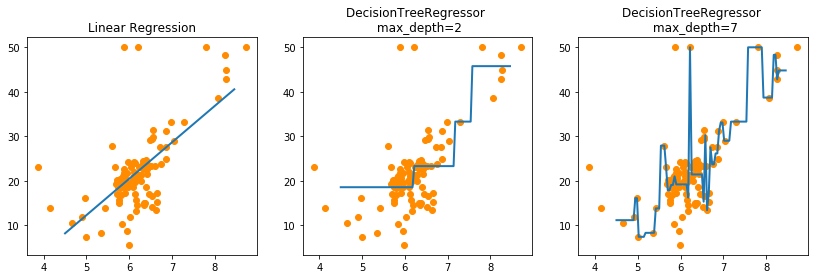

In [19]:
#X_test와 예측 데이터를 기반으로, 예측된 회귀선을 그려보자.(시각화)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

#선형회귀(lr_reg)
ax1.set_title('Linear Regression')
ax1.scatter(sample_df['RM'], sample_df['PRICE'], c= 'darkorange') #원본 데이터의 scatter(아까 그렸던 것)
ax1.plot(X_test, pred_lr, label='linear', linewidth=2) #예측된 회귀선

#DT (rf_reg2)
ax2.set_title('DecisionTreeRegressor \n max_depth=2')
ax2.scatter(sample_df['RM'], sample_df['PRICE'], c= 'darkorange') #원본 데이터의 scatter(아까 그렸던 것)
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2) #예측된 회귀트리 선(max_depth가 작아서 단순)

#DT (rf_reg7)
ax3.set_title('DecisionTreeRegressor \n max_depth=7')
ax3.scatter(sample_df['RM'], sample_df['PRICE'], c= 'darkorange') #원본 데이터의 scatter(아까 그렸던 것)
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2) #예측된 회귀트리 선(max_depth가 커서 복잡, 과적합 위험)

plt.show()